# Chapter 4
## 1. Introduction to CNN(Convolutional Neural Network)
- 입력 데이터의 모든 특징을 한번에 학습하지 않고 부분적인 특징을 여러 구간에서 학습하고자 하는 알고리즘
- CNN을 구성하는 층
    - i) 합성곱 계층(Convolution layer) : kernal size/ filters
    - ii) 풀링 계층(Pooling layer)
    - iii) 완전 연결 계층(Fully connected layer)

## 2. Concolution Neural Network
### 1. images are numbers
- 각 pixel의 값을 [0,255] 사이의 숫자로 변환 후 matrix로 변환하여 이미지를 모델에 넣을 수 있는 데이터의 형태가 됨
- 0: black, 255: white
- color image: 1080* 1080 * 3 형식의 3차원 data matrix

### 2. Feature Extraction with Convolution

### 3. Convolution Neural Network


## 3. Example models
### Example 1: convolution neural network model

In [2]:
import tensorflow as tf
def generate_model():
    model=tf.keras.Sequential([
        # first convolutional layer
        tf.keras.layers.Conv2D(filters=32, filter_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # second convolutional layer
        tf.keras.layers.Conv2D(filters=64, filter_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # fully connected classifier
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, filter_size=3, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') # 막판에 img class 개수가 10개다: 분류니까 loss는 'categorical_crossentropy' 
    ])
    
    return model

### Example 2: convolution neural network for 2D

In [19]:
32*5*5+32

832

In [13]:
64*3*3*32+64

18496

In [11]:
32*3*3*3+32

896

## 4. Study Case

### 4-1. MNIST Data
- 70,000개의 28 * 28 저해상도 흑백 이미지 포함
- 전체 데이터 셋에서 이미지가 속한 클래스는 총 10개
- 0부터 9까지의 숫자에 대한 손글씨 이미지

In [3]:
# import library
import sys
import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# hyperparameter
batch_size=128
num_classes=10
epochs=12

In [5]:
# keras에 저장된 mnist dataset을 불러들인 후 train/test split
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

print(f'x_train : {x_train.shape}') # (데이터 개수, 28 X 28 pixel)
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


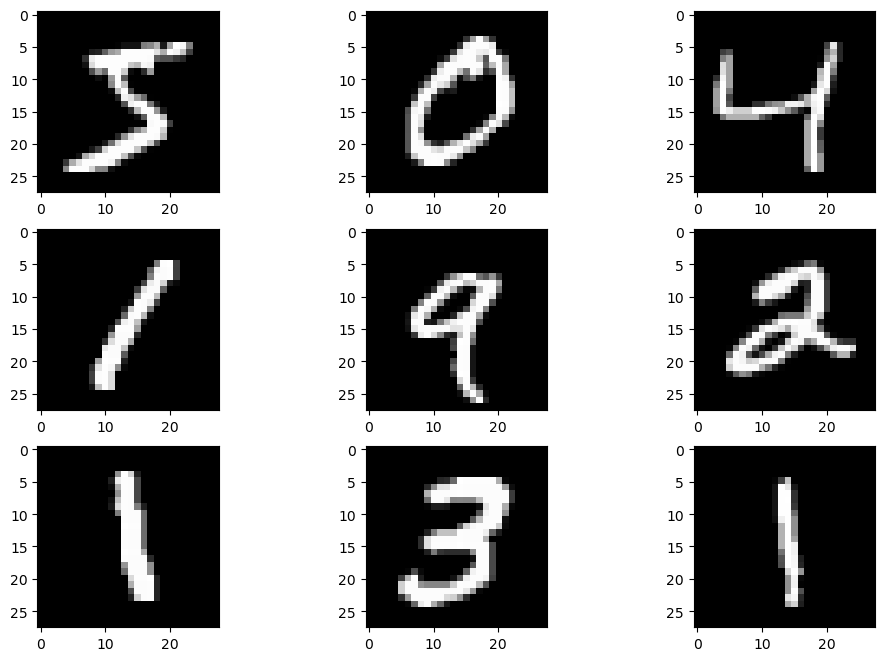

In [6]:
plt.figure(figsize=(12,8))
count = 0
for i in range(9):
 count += 1
 plt.subplot(3,3,count)
 plt.imshow(x_train[i].reshape(28,28), cmap = plt.get_cmap('gray'), interpolation='nearest')
plt.show()

In [7]:
# 데이터를 학습하기 위한 전처리 : 각 pixel의 값을 숫자로 변형
img_rows=28
img_cols=28

input_shape=(img_rows, img_cols, 1)

# reshaping mnist dataset
x_train=x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test=x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [8]:
# data normalization
x_train /=255.
x_test /=255.

In [9]:
# y에 해당하는 label 값은 0부터 9까지 10개의 숫자이므로 model에 넣기 위해 one-hot encoding 필요
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

In [11]:
# CNN model을 만든 후 데이터 학습
# convolutional neural network
model=keras.Sequential(([
    layers.Conv2D(32, kernel_size=(5,5), strides=1, activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
]))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [12]:
# 분류 문제이므로 model.compile 층에서 option은 classification의 option과 동일하게 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1,
 validation_data=(x_test, y_test)) # epochs 조정
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 40s 81ms/step - loss: 0.3599 - accuracy: 0.8905 - val_loss: 0.0894 - val_accuracy: 0.9746
Epoch 2/10
469/469 [==============================] - 38s 80ms/step - loss: 0.1078 - accuracy: 0.9669 - val_loss: 0.0558 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 4/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0364 - val_accuracy: 0.9878
Epoch 6/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0282 - val_accuracy:

313/313 [==============================] - 3s 10ms/step


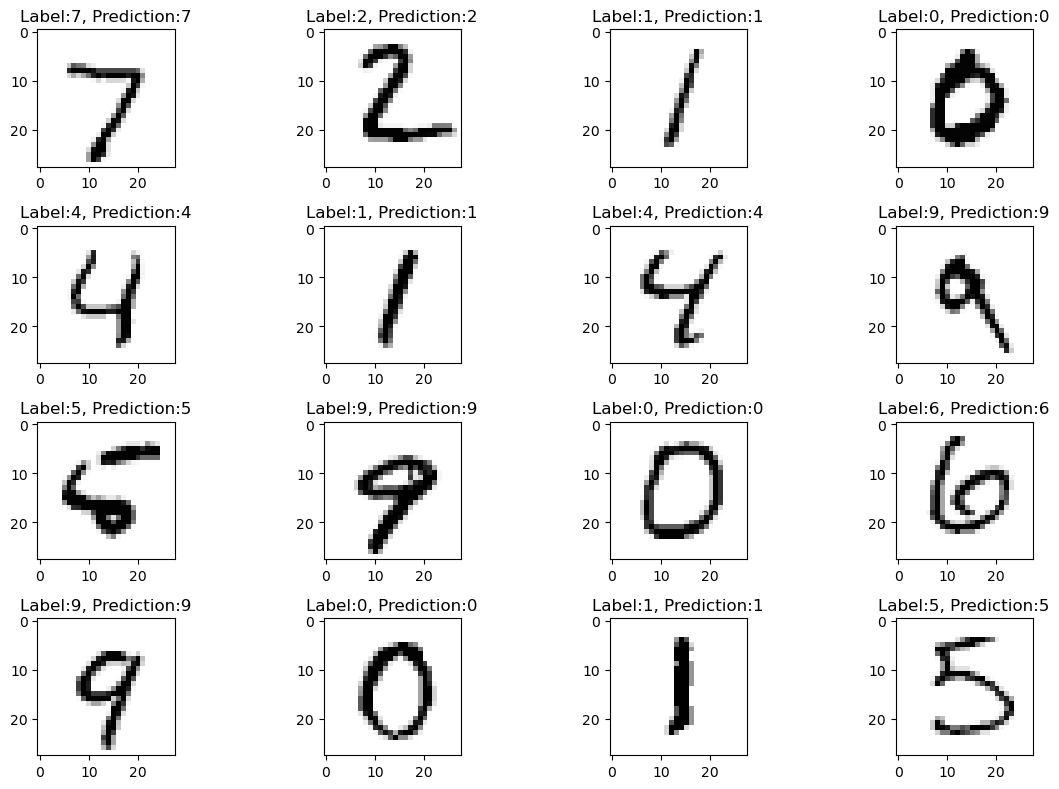

In [13]:
import random
import matplotlib.pyplot as plt
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1) # 확률의 최대값의 index 를 추출하며 여기서는index 가 label 과 동일하다.
test_labels = np.argmax(y_test, axis=1)
count = 0
plt.figure(figsize=(12,8))
for n in range(16):
 count += 1
 plt.subplot(4, 4, count)
 plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
 tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
 plt.title(tmp)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(y_test,axis=1)
print(ypred_class.size)
print(ytest_class.size)

313/313 [==============================] - 3s 9ms/step
10000
10000


In [15]:
conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1130    2    1    0    0    1    0    1    0]
 [   1    2 1026    0    1    0    0    1    1    0]
 [   0    0    1 1007    0    0    0    1    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    1    5    0  877    1    1    2    3]
 [   3    2    1    0    1    0  950    0    1    0]
 [   0    3    6    3    0    0    0 1011    1    4]
 [   2    0    1    1    0    0    1    0  965    4]
 [   1    1    0    0    2    2    0    1    1 1001]]


In [16]:
misclassified=np.where(ypred_class!=ytest_class)
aa=np.asarray(misclassified)
print(misclassified)
print(len(misclassified[0]))

(array([ 340,  619,  659,  684,  740,  947,  965, 1014, 1039, 1226, 1232,
       1242, 1260, 1299, 1326, 1393, 1709, 1737, 1878, 1901, 2035, 2070,
       2098, 2109, 2130, 2135, 2387, 2488, 2597, 2654, 2896, 2995, 3073,
       3225, 3289, 3422, 3451, 3520, 3558, 3727, 3767, 3806, 3808, 3906,
       4007, 4027, 4176, 4238, 4256, 4359, 4507, 4639, 4711, 4761, 4807,
       5246, 5937, 5955, 5981, 5997, 6505, 6560, 6576, 6597, 6625, 6651,
       6783, 8059, 8094, 8408, 9009, 9015, 9634, 9679, 9692, 9729, 9770],
      dtype=int64),)
77


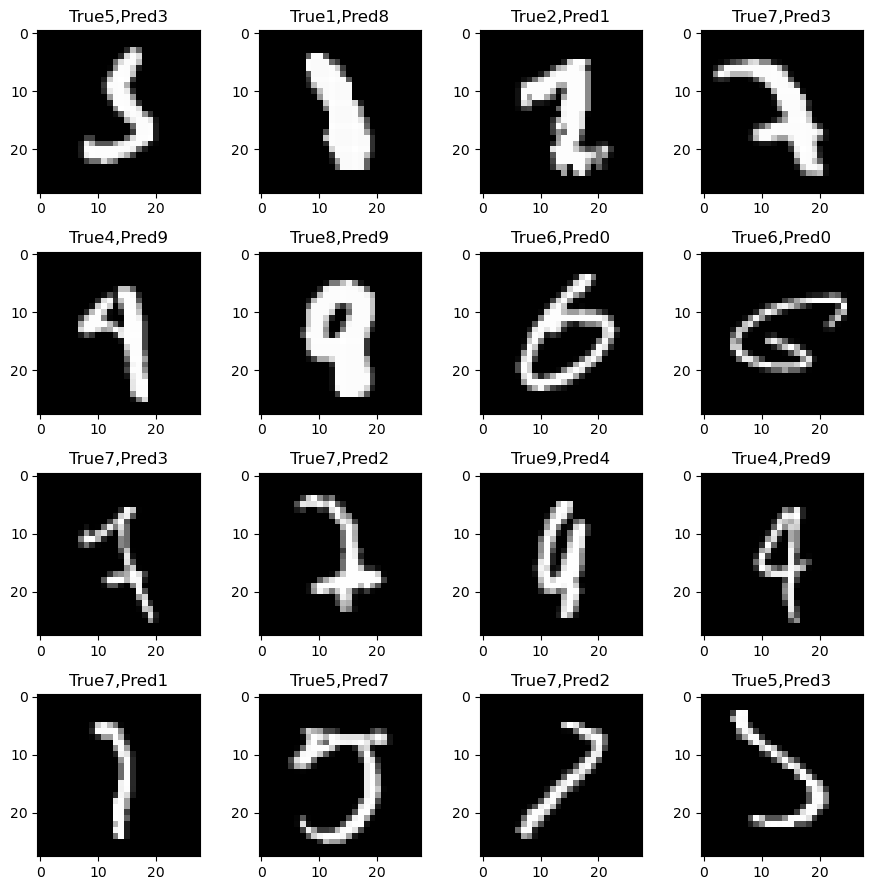

In [17]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(16):
 plt.subplot(4,4,i+1)
 plt.imshow(x_test[aa[0,i]].reshape(28, 28), cmap='gray', interpolation='none')
 plt.title("True{},Pred{}".format(ytest_class[aa[0,i]],ypred_class[aa[0,i]]))
plt.tight_layout()

## 4-2. CIFAR10 data 

In [20]:
# import library
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

In [22]:
# example of loading the cifar10 dataset
import matplotlib.pyplot as plt
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

170498071/170498071 [==============================] - 87s 1us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


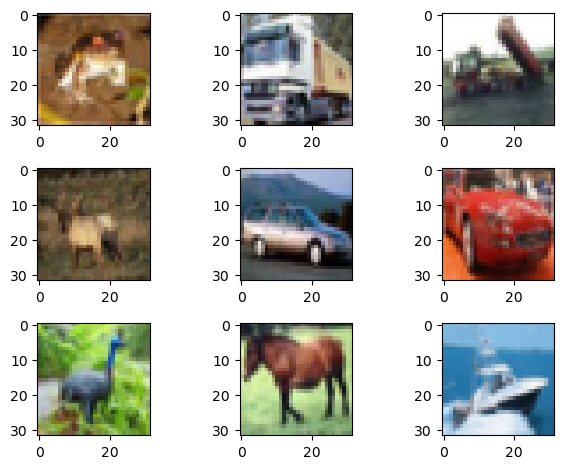

In [23]:
# plot first few images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(trainX[i])
 
# show the figure
plt.tight_layout()

In [24]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [25]:
# basic model
def basic_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
 
    model.add(Dense(10, activation='softmax'))
 
 # compile model
    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
    return model
# model summary
model = basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [26]:
# setting callback option
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_accuracy', patience = 20)
mc = ModelCheckpoint("./model/checkpoint.{epoch:02d}.hdf5", monitor = "val_accuracy")

In [28]:
epochs =5
batch_size = 32
history = model.fit(train_norm, trainY, epochs = epochs, batch_size = batch_size,
 validation_data = (test_norm, testY), verbose =1, callbacks = [es, mc])

Epoch 1/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8400 - accuracy: 0.7094 - val_loss: 0.9006 - val_accuracy: 0.6878
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7743 - accuracy: 0.7327 - val_loss: 0.8967 - val_accuracy: 0.6864
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7247 - accuracy: 0.7499 - val_loss: 0.8776 - val_accuracy: 0.6979
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6852 - accuracy: 0.7625 - val_loss: 0.8507 - val_accuracy: 0.7162
Epoch 5/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6506 - accuracy: 0.7755 - val_loss: 0.8890 - val_accuracy: 0.6994


In [29]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplots(figsize = (15,6))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.9, wspace=0.3, hspace=0.2)
 
    # plot loss
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
 
    # plot accuracy
    plt.subplot(122)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

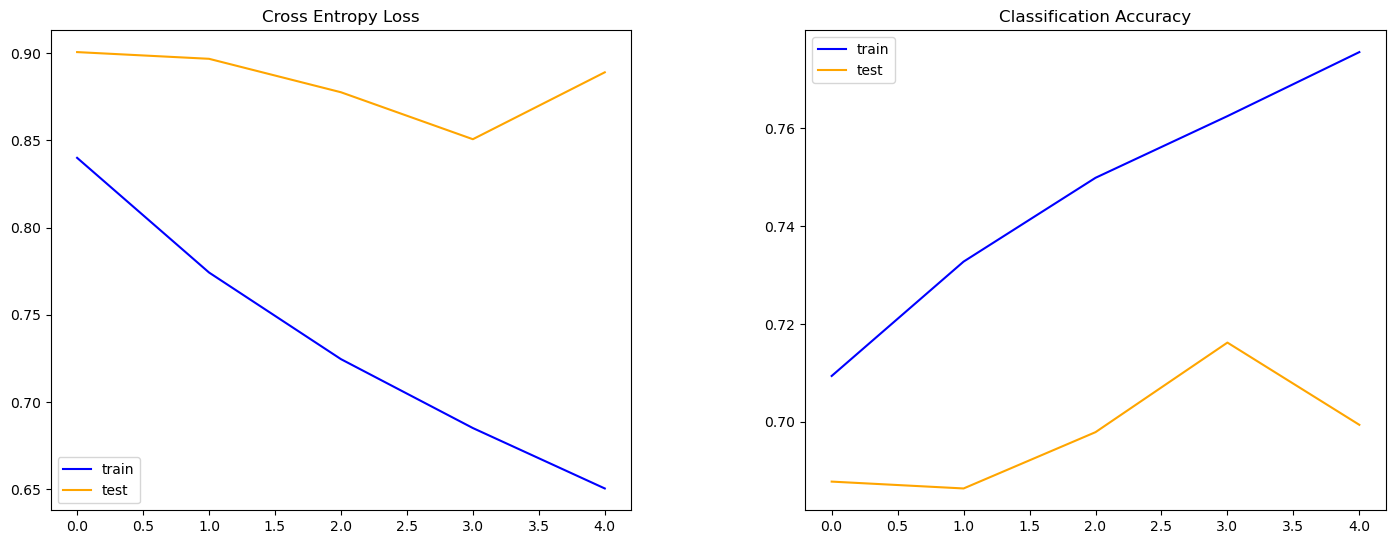

In [30]:
summarize_diagnostics(history)

In [31]:
# Evaluation 
score = model.evaluate(test_norm, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8889914751052856
Test accuracy: 0.699400007724762


In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred=model.predict(test_norm)
ypred_class=np.argmax(y_pred,axis=1)
ytest_class=np.argmax(testY,axis=1)
conf_mat=confusion_matrix(ytest_class,ypred_class)
print(conf_mat)

313/313 [==============================] - 3s 9ms/step
[[763   9  40  23  14   3   3  16  62  67]
 [ 22 733   5   9   2   1   7  14  22 185]
 [ 83   4 552  62  80  55  45  81  14  24]
 [ 24   6  66 523  68 140  47  66  22  38]
 [ 25   4  75  63 627  29  34 125  10   8]
 [ 18   2  49 180  43 547  13 109  11  28]
 [  9   1  61  79  47  19 726  18  10  30]
 [ 10   1  23  27  52  22   4 826   0  35]
 [ 60  14   8  18   7   5   3   6 825  54]
 [ 34  40   4  11   4   2   1  15  17 872]]
